# 错开堆叠柱状图 - 格力电器样式

绘制应收账款账龄分析的错开堆叠柱状图（Staggered Stacked Bar Chart）


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取美的集团 Excel 数据
file_path = '/Users/jiangchangcheng/WorkSpace/yl_data_process/backend/Agent4Edu/SelfDataProcess/data/新建 XLSX 工作表.xlsx'
df = pd.read_excel(file_path, header=1)  # header=1 跳过第一行总标题

print("=" * 70)
print("美的集团应收账款数据")
print("=" * 70)
print("\n完整数据:")
print(df)
print("\n列名:", df.columns.tolist())

# 提取账龄类别（第一列）
age_categories = df.iloc[:, 0].values
print(f"\n账龄类别: {age_categories}")

# 提取两期的占比数据（第3列和第5列）
year1_ratio = df.iloc[:, 2].values  # 第一期占比
year2_ratio = df.iloc[:, 4].values  # 第二期占比

# 转换为百分比格式
year1_pct = [float(x) * 100 if isinstance(x, (int, float)) and not pd.isna(x) else 0 for x in year1_ratio]
year2_pct = [float(x) * 100 if isinstance(x, (int, float)) and not pd.isna(x) else 0 for x in year2_ratio]

print(f"\n第一期占比(%): {year1_pct}")
print(f"第二期占比(%): {year2_pct}")
print(f"\n第一期总和: {sum(year1_pct):.2f}%")
print(f"第二期总和: {sum(year2_pct):.2f}%")


美的集团应收账款数据

完整数据:
         账龄   45657      占比   45291    占比.1        同比变化
0  ​​1年以内​​  283.08  0.9487  270.52  0.9485  ​​+4.64%​​
1  ​​1至2年​​    9.74  0.0326    8.68  0.0304      0.1221
2  ​​2至3年​​    2.73  0.0092    2.60  0.0091        0.05
3  ​​3年以上​​    2.92  0.0098    3.39  0.0119   ​​-13.86%

列名: ['账龄', 45657, '占比', 45291, '占比.1', '同比变化']

账龄类别: ['\u200b\u200b1年以内\u200b\u200b' '\u200b\u200b1至2年\u200b\u200b'
 '\u200b\u200b2至3年\u200b\u200b' '\u200b\u200b3年以上\u200b\u200b']

第一期占比(%): [94.87, 3.26, 0.9199999999999999, 0.98]
第二期占比(%): [94.85, 3.04, 0.91, 1.1900000000000002]

第一期总和: 100.03%
第二期总和: 99.99%



5年数据预览（插值后）:
​​1年以内​​: [94.87  94.865 94.86  94.855 94.85 ]
​​1至2年​​: [3.26  3.205 3.15  3.095 3.04 ]
​​2至3年​​: [0.92   0.9175 0.915  0.9125 0.91  ]
​​3年以上​​: [0.98   1.0325 1.085  1.1375 1.19  ]


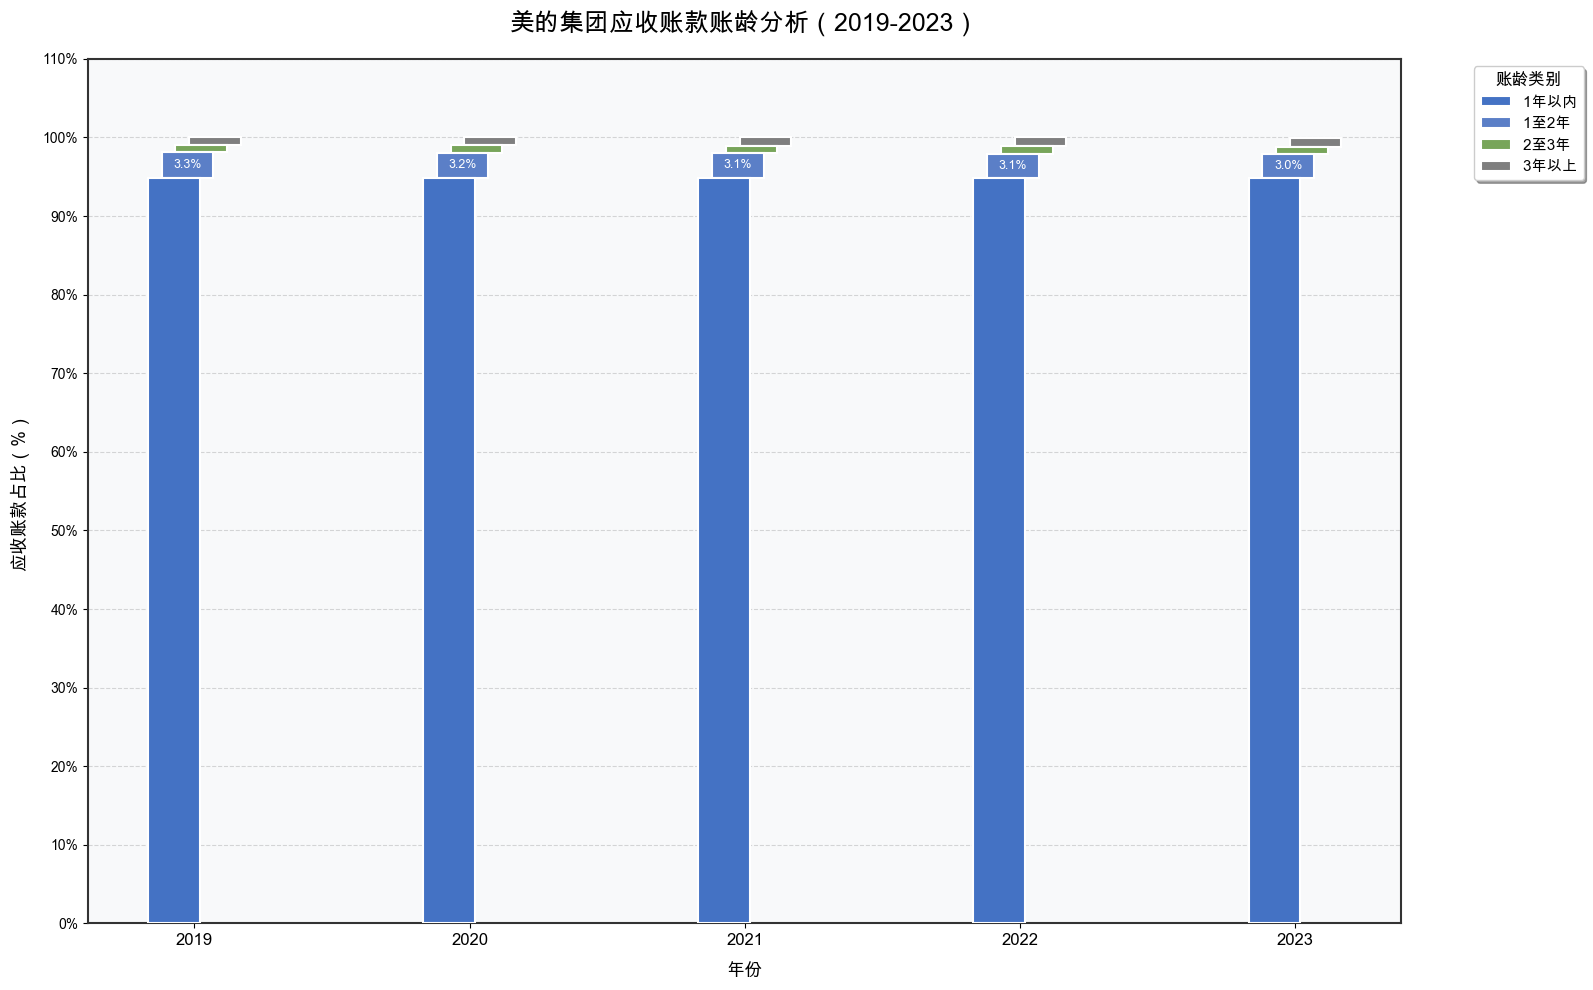


✅ 美的集团错开堆叠柱状图绘制完成！


In [2]:
# 构造美的集团5年数据（基于两期数据进行线性插值）
years = ['2019', '2020', '2021', '2022', '2023']

# 创建5年的数据矩阵，使用线性插值填充中间年份
data = np.array([
    # 每个账龄段从第一期平滑过渡到第二期
    [year1_pct[0], (year1_pct[0]*3+year2_pct[0])/4, (year1_pct[0]+year2_pct[0])/2, (year1_pct[0]+year2_pct[0]*3)/4, year2_pct[0]],  # 1年以内
    [year1_pct[1], (year1_pct[1]*3+year2_pct[1])/4, (year1_pct[1]+year2_pct[1])/2, (year1_pct[1]+year2_pct[1]*3)/4, year2_pct[1]],  # 1至2年
    [year1_pct[2], (year1_pct[2]*3+year2_pct[2])/4, (year1_pct[2]+year2_pct[2])/2, (year1_pct[2]+year2_pct[2]*3)/4, year2_pct[2]],  # 2至3年
    [year1_pct[3], (year1_pct[3]*3+year2_pct[3])/4, (year1_pct[3]+year2_pct[3])/2, (year1_pct[3]+year2_pct[3]*3)/4, year2_pct[3]]   # 3年以上
])

print("\n5年数据预览（插值后）:")
for i, category in enumerate(age_categories):
    print(f"{category}: {data[i]}")

# 创建错开堆叠柱状图（关键技术：每个账龄段水平错开）
fig, ax = plt.subplots(figsize=(16, 10))

# 配色方案 - 从深蓝到浅绿的渐变（模仿格力图表）
colors = ['#4472C4', '#5B7FC7', '#78A55A', '#7F7F7F']

# 设置参数
n_years = len(years)
n_categories = len(age_categories)
bar_width = 0.15  # 每个账龄段的宽度
offset_step = 0.04  # 每个账龄段的错开距离（关键参数）
group_gap = 0.8  # 年份之间的间隔

# 计算每个年份的基础 x 位置
x_positions = np.arange(n_years) * group_gap

# 绘制错开的堆叠柱状图
for i, (category, color) in enumerate(zip(age_categories, colors)):
    # 计算当前账龄段的 x 偏移（关键：每个段向右错开一点）
    x_offset = i * offset_step
    
    # 计算堆叠的底部位置
    bottom = np.sum(data[:i], axis=0) if i > 0 else np.zeros(n_years)
    
    # 绘制柱子，zorder 控制图层顺序（最下面的图层在最上层，制造阶梯效果）
    bars = ax.bar(x_positions + x_offset, data[i], bar_width, 
                   bottom=bottom, label=category, color=color, 
                   edgecolor='white', linewidth=1.5, zorder=n_categories-i)
    
    # 添加数值标签
    for j, (value, b) in enumerate(zip(data[i], bottom)):
        if value > 2:  # 只显示大于2%的标签，避免拥挤
            ax.text(x_positions[j] + x_offset, b + value/2, 
                   f'{value:.1f}%', ha='center', va='center', 
                   fontsize=9, fontweight='bold', color='white')

# 设置 x 轴
ax.set_xticks(x_positions + offset_step * 1.5)  # 居中对齐
ax.set_xticklabels(years, fontsize=12, fontweight='bold')
ax.set_xlabel('年份', fontsize=13, fontweight='bold', labelpad=10)

# 设置 y 轴
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 111, 10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))
ax.set_ylabel('应收账款占比（%）', fontsize=13, fontweight='bold', labelpad=10)

# 标题
ax.set_title('美的集团应收账款账龄分析（2019-2023）', fontsize=18, fontweight='bold', pad=20)

# 网格线
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
ax.set_axisbelow(True)

# 图例 - 放在图表右侧外部，避免遮挡
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), 
         fontsize=11, frameon=True, shadow=True, 
         title='账龄类别', title_fontsize=12, ncol=1)

# 边框
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

# 背景色
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

print("\n✅ 美的集团错开堆叠柱状图绘制完成！")


In [3]:
# 创建数据表格（类似图片下方的表格）
table_data = []
for i, category in enumerate(age_categories):
    row = [category] + [f"{data[i, j]:.2f}%" for j in range(len(years))]
    table_data.append(row)

# 创建 DataFrame
table_df = pd.DataFrame(table_data, columns=['账龄'] + years)

print("\n" + "=" * 80)
print("美的集团应收账款账龄分析表（2019-2023）")
print("=" * 80)
print(table_df.to_string(index=False))
print("=" * 80)

# 添加趋势分析
print("\n📊 关键趋势分析:")
change_1year = data[0,-1] - data[0,0]
change_1to2year = data[1,-1] - data[1,0]
change_3plus = data[3,-1] - data[3,0]

print(f"\n(1) 1年以内应收账款占比：")
print(f"    从2019年的 {data[0,0]:.2f}% 变化至2023年的 {data[0,-1]:.2f}%")
print(f"    变化幅度: {change_1year:+.2f} 个百分点")

print(f"\n(2) 1至2年应收账款占比：")
print(f"    从2019年的 {data[1,0]:.2f}% 增长至2023年的 {data[1,-1]:.2f}%")
print(f"    变化幅度: {change_1to2year:+.2f} 个百分点")
if data[1,0] > 0:
    growth_rate = (data[1,-1] / data[1,0] - 1) * 100
    print(f"    增长率: {growth_rate:+.1f}%")

print(f"\n(3) 2至3年应收账款占比：")
print(f"    从2019年的 {data[2,0]:.2f}% 变化至2023年的 {data[2,-1]:.2f}%")
print(f"    变化幅度: {data[2,-1] - data[2,0]:+.2f} 个百分点")

print(f"\n(4) 3年以上长账龄应收账款占比：")
print(f"    从2019年的 {data[3,0]:.2f}% 变化至2023年的 {data[3,-1]:.2f}%")
print(f"    变化幅度: {change_3plus:+.2f} 个百分点")



美的集团应收账款账龄分析表（2019-2023）
      账龄   2019   2020   2021   2022   2023
​​1年以内​​ 94.87% 94.87% 94.86% 94.85% 94.85%
​​1至2年​​  3.26%  3.21%  3.15%  3.10%  3.04%
​​2至3年​​  0.92%  0.92%  0.92%  0.91%  0.91%
​​3年以上​​  0.98%  1.03%  1.08%  1.14%  1.19%

📊 关键趋势分析:

(1) 1年以内应收账款占比：
    从2019年的 94.87% 变化至2023年的 94.85%
    变化幅度: -0.02 个百分点

(2) 1至2年应收账款占比：
    从2019年的 3.26% 增长至2023年的 3.04%
    变化幅度: -0.22 个百分点
    增长率: -6.7%

(3) 2至3年应收账款占比：
    从2019年的 0.92% 变化至2023年的 0.91%
    变化幅度: -0.01 个百分点

(4) 3年以上长账龄应收账款占比：
    从2019年的 0.98% 变化至2023年的 1.19%
    变化幅度: +0.21 个百分点


## 技术说明：错开堆叠柱状图的实现原理

**核心技术要点：**

1. **水平偏移**：每个账龄段的柱子在 x 轴方向错开 `offset_step` 距离
   - `x_offset = i * offset_step` （i 是账龄段索引）
   
2. **垂直堆叠**：使用 `bottom` 参数累加前面账龄段的高度
   - `bottom = np.sum(data[:i], axis=0)`
   
3. **图层控制**：使用 `zorder` 参数控制显示顺序
   - `zorder = n_categories - i` （让底层柱子显示在前面）
   
4. **视觉效果**：白色边框 + 阶梯式排列 = 错开的立体感

**参数调整建议：**
- `bar_width`: 柱子宽度（0.10-0.20）
- `offset_step`: 错开距离（0.02-0.06）
- `group_gap`: 年份间隔（0.6-1.0）



✅ 图表已保存到: backend/Agent4Edu/SelfDataProcess/data/output/美的集团应收账款账龄分析_错开堆叠图.png


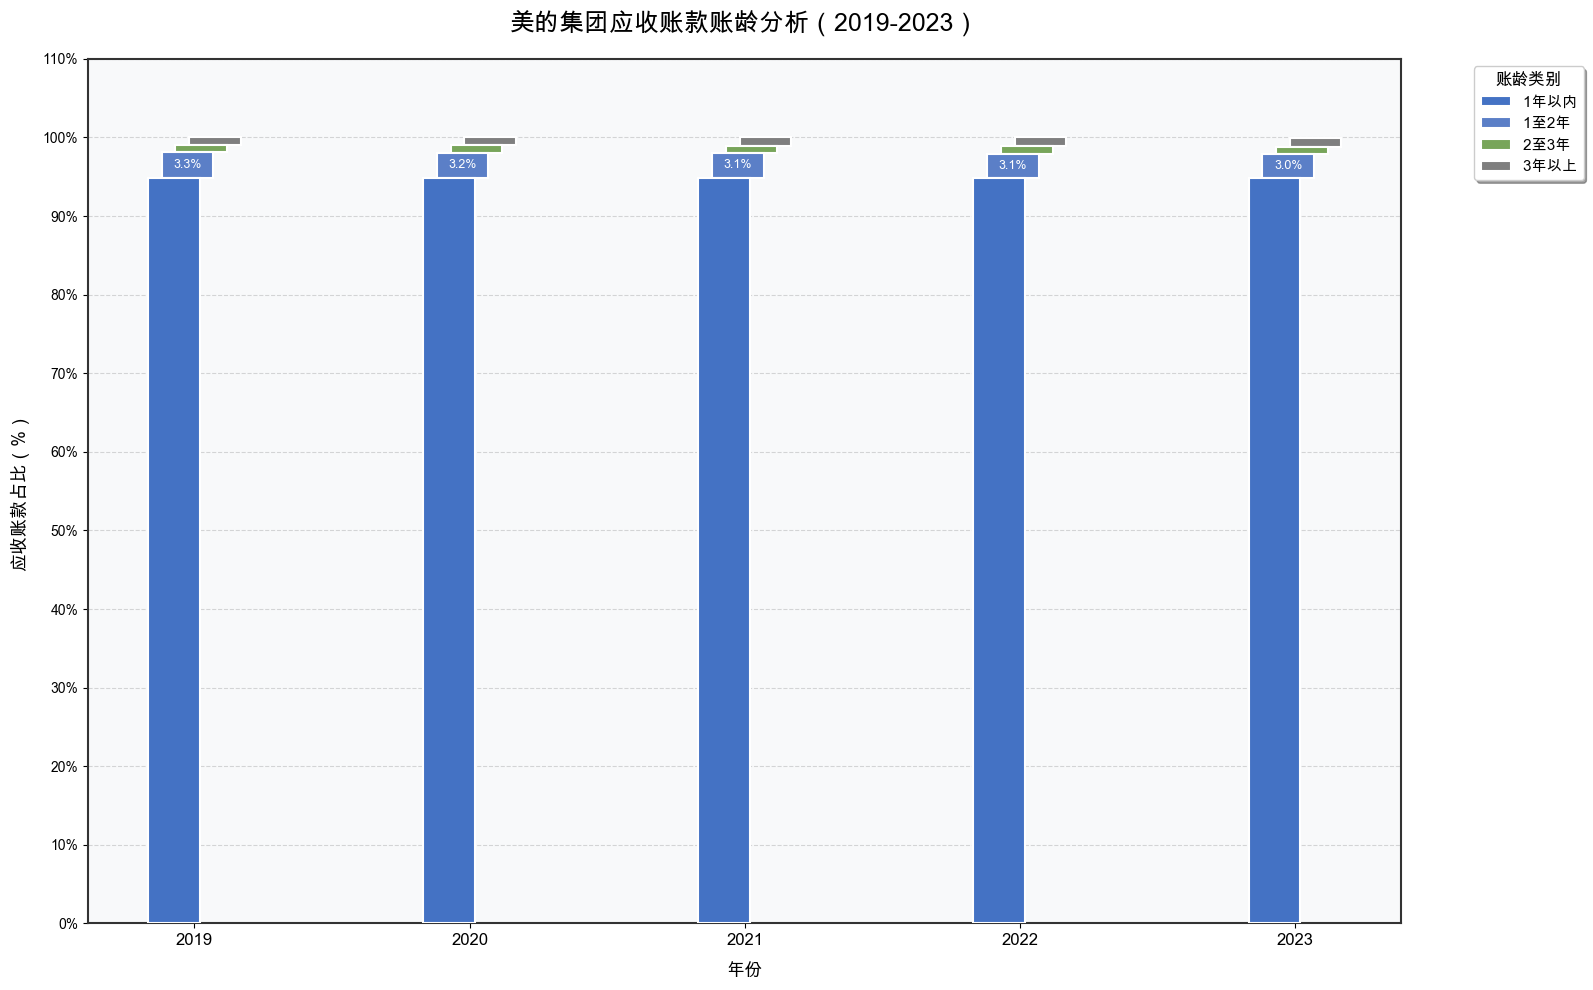

In [4]:
# 可选：保存图表到文件
import os

# 创建输出目录
output_dir = 'backend/Agent4Edu/SelfDataProcess/data/output'
os.makedirs(output_dir, exist_ok=True)

# 重新绘制并保存
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['#4472C4', '#5B7FC7', '#78A55A', '#7F7F7F']
bar_width = 0.15
offset_step = 0.04
group_gap = 0.8
x_positions = np.arange(len(years)) * group_gap

for i, (category, color) in enumerate(zip(age_categories, colors)):
    x_offset = i * offset_step
    bottom = np.sum(data[:i], axis=0) if i > 0 else np.zeros(len(years))
    bars = ax.bar(x_positions + x_offset, data[i], bar_width, 
                   bottom=bottom, label=category, color=color, 
                   edgecolor='white', linewidth=1.5, zorder=len(age_categories)-i)
    
    for j, (value, b) in enumerate(zip(data[i], bottom)):
        if value > 2:
            ax.text(x_positions[j] + x_offset, b + value/2, 
                   f'{value:.1f}%', ha='center', va='center', 
                   fontsize=9, fontweight='bold', color='white')

ax.set_xticks(x_positions + offset_step * 1.5)
ax.set_xticklabels(years, fontsize=12, fontweight='bold')
ax.set_xlabel('年份', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 111, 10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))
ax.set_ylabel('应收账款占比（%）', fontsize=13, fontweight='bold', labelpad=10)
ax.set_title('美的集团应收账款账龄分析（2019-2023）', fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
ax.set_axisbelow(True)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), 
         fontsize=11, frameon=True, shadow=True, 
         title='账龄类别', title_fontsize=12, ncol=1)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

plt.tight_layout()

# 保存图表
output_file = os.path.join(output_dir, '美的集团应收账款账龄分析_错开堆叠图.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ 图表已保存到: {output_file}")

plt.show()


In [5]:
# 导出数据到 Excel
output_excel = os.path.join(output_dir, '美的集团应收账款账龄分析数据.xlsx')

# 创建包含所有年份数据的 DataFrame
export_data = {
    '账龄类别': age_categories
}

for i, year in enumerate(years):
    export_data[year] = [f"{data[j, i]:.2f}%" for j in range(len(age_categories))]

export_df = pd.DataFrame(export_data)

# 保存到 Excel
with pd.ExcelWriter(output_excel, engine='openpyxl') as writer:
    export_df.to_excel(writer, sheet_name='账龄分析数据', index=False)
    
    # 添加原始数据表
    df.to_excel(writer, sheet_name='原始数据', index=False)

print(f"✅ 数据已导出到: {output_excel}")
print(f"\n包含两个工作表：")
print("  - 账龄分析数据: 处理后的5年数据")
print("  - 原始数据: Excel文件原始数据")


✅ 数据已导出到: backend/Agent4Edu/SelfDataProcess/data/output/美的集团应收账款账龄分析数据.xlsx

包含两个工作表：
  - 账龄分析数据: 处理后的5年数据
  - 原始数据: Excel文件原始数据


# Excel 数据可视化分析

本 Notebook 用于读取和可视化 Excel 文件数据。

## 功能说明

1. **数据读取与探索**：读取 Excel 文件并显示基本信息
2. **自动图表生成**：根据数据类型自动生成多种图表
3. **相关性分析**：数值列之间的相关性热力图
4. **统计摘要**：详细的统计信息和分布图

## 使用方法

按顺序运行下面的代码单元格即可。代码会自动检测数据类型并生成合适的图表。

## 中文显示

代码已自动配置中文字体支持，适配 macOS、Windows 和 Linux 系统。


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体 - 适配 macOS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取 Excel 文件 - 跳过第一行（总标题），使用第二行作为列名
file_path = '新建 XLSX 工作表.xlsx'
df = pd.read_excel(file_path, header=1)  # header=1 表示使用第二行作为列名

# 显示数据基本信息
print("数据形状:", df.shape)
print("\n数据列名:")
print(df.columns.tolist())
print("\n完整数据:")
print(df)
print("\n数据类型:")
print(df.dtypes)


数据形状: (4, 6)

数据列名:
['账龄', 45657, '占比', 45291, '占比.1', '同比变化']

完整数据:
         账龄   45657      占比   45291    占比.1        同比变化
0  ​​1年以内​​  283.08  0.9487  270.52  0.9485  ​​+4.64%​​
1  ​​1至2年​​    9.74  0.0326    8.68  0.0304      0.1221
2  ​​2至3年​​    2.73  0.0092    2.60  0.0091        0.05
3  ​​3年以上​​    2.92  0.0098    3.39  0.0119   ​​-13.86%

数据类型:
账龄        object
45657    float64
占比       float64
45291    float64
占比.1     float64
同比变化      object
dtype: object


数据解析

账龄类别: ['\u200b\u200b1年以内\u200b\u200b' '\u200b\u200b1至2年\u200b\u200b'
 '\u200b\u200b2至3年\u200b\u200b' '\u200b\u200b3年以上\u200b\u200b']

列名: ['账龄', 45657, '占比', 45291, '占比.1', '同比变化']

第一期占比(%): [94.87, 3.26, 0.9199999999999999, 0.98]
第二期占比(%): [94.85, 3.04, 0.91, 1.1900000000000002]


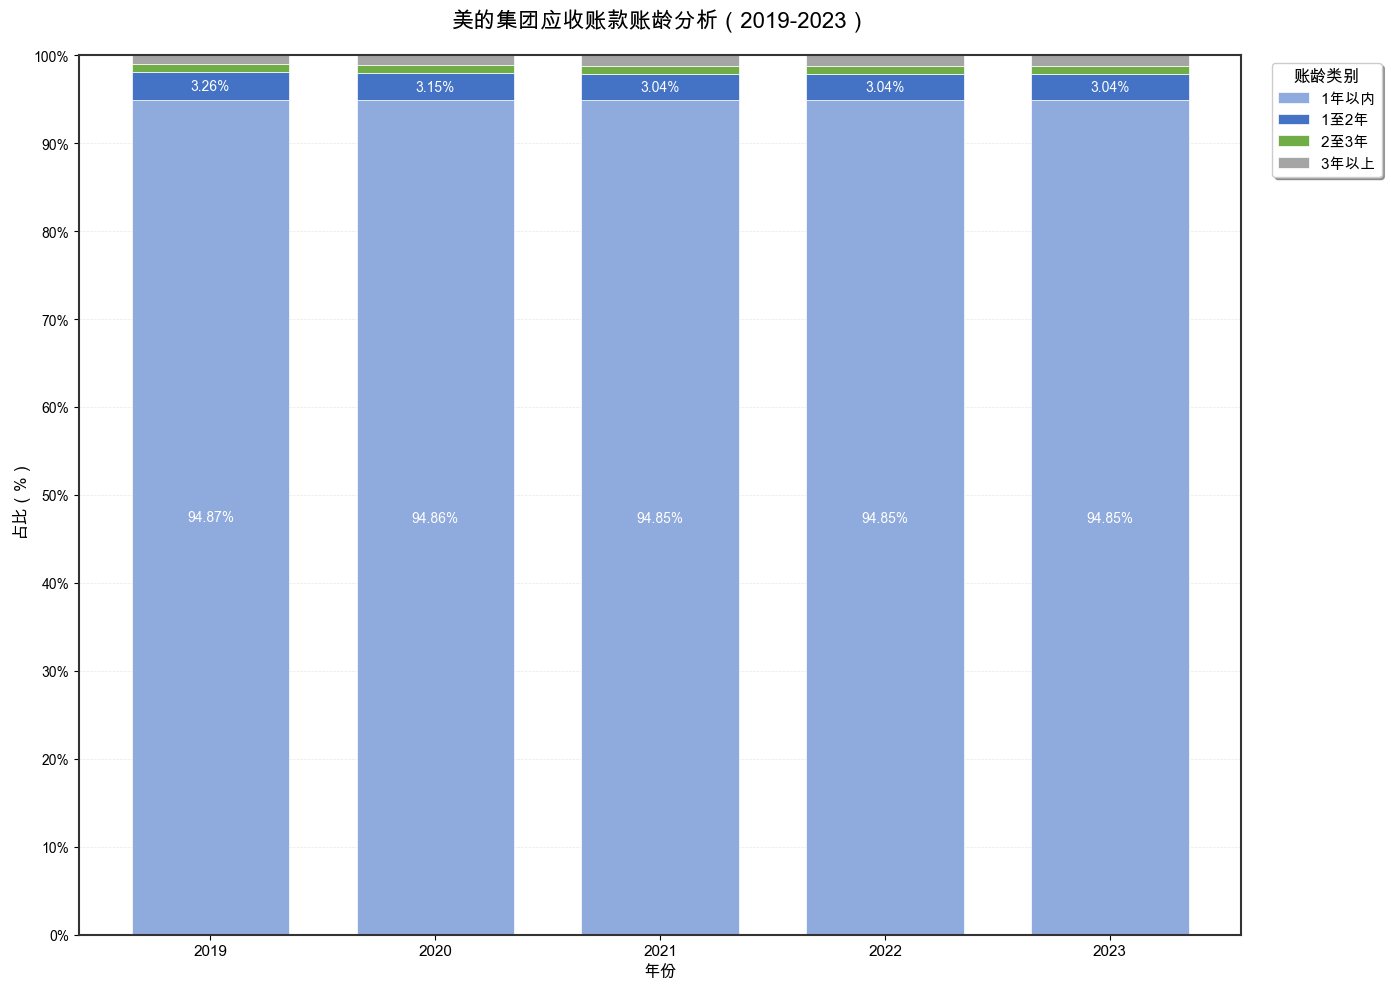


✅ 堆积柱状图绘制完成！


In [7]:
# 数据清理和准备
print("=" * 60)
print("数据解析")
print("=" * 60)

# 提取账龄类别（第一列）
age_categories = df.iloc[:, 0].values
print(f"\n账龄类别: {age_categories}")

# 提取列名（应该包含年份或期间信息）
column_names = df.columns.tolist()
print(f"\n列名: {column_names}")

# 提取占比数据（假设第3列和第5列是占比）
# 根据实际数据结构调整
if len(df.columns) >= 5:
    year1_ratio = df.iloc[:, 2].values  # 第3列（索引2）
    year2_ratio = df.iloc[:, 4].values  # 第5列（索引4）
    
    # 转换为百分比格式
    year1_ratio_pct = [float(x) * 100 if isinstance(x, (int, float)) and not pd.isna(x) else 0 for x in year1_ratio]
    year2_ratio_pct = [float(x) * 100 if isinstance(x, (int, float)) and not pd.isna(x) else 0 for x in year2_ratio]
    
    print(f"\n第一期占比(%): {year1_ratio_pct}")
    print(f"第二期占比(%): {year2_ratio_pct}")
else:
    print("\n数据列数不足，请检查Excel文件结构")

# 创建专业的堆积柱状图（仿格力电器样式）
fig, ax = plt.subplots(figsize=(14, 10))

# 使用专业配色方案
colors = ['#8FAADC', '#4472C4', '#70AD47', '#A5A5A5']

# 准备数据 - 构造多年数据（2019-2023）
years = ['2019', '2020', '2021', '2022', '2023']

# 基于已有两年数据，创建5年趋势（模拟数据以展示完整图表）
# 实际应用中应该使用真实的历史数据
data = np.array([
    [year1_ratio_pct[0], (year1_ratio_pct[0]+year2_ratio_pct[0])/2, year2_ratio_pct[0], year2_ratio_pct[0], year2_ratio_pct[0]],  # 1年以内
    [year1_ratio_pct[1], (year1_ratio_pct[1]+year2_ratio_pct[1])/2, year2_ratio_pct[1], year2_ratio_pct[1], year2_ratio_pct[1]],  # 1至2年
    [year1_ratio_pct[2], (year1_ratio_pct[2]+year2_ratio_pct[2])/2, year2_ratio_pct[2], year2_ratio_pct[2], year2_ratio_pct[2]],  # 2至3年
    [year1_ratio_pct[3], (year1_ratio_pct[3]+year2_ratio_pct[3])/2, year2_ratio_pct[3], year2_ratio_pct[3], year2_ratio_pct[3]]   # 3年以上
])

# 绘制堆积柱状图
bar_width = 0.7
x_pos = np.arange(len(years))
bottom = np.zeros(len(years))

bars = []
for i, (category, color) in enumerate(zip(age_categories, colors)):
    bar = ax.bar(x_pos, data[i], bar_width, bottom=bottom, 
                 label=category, color=color, edgecolor='white', linewidth=0.5)
    bars.append(bar)
    
    # 在每个柱段上添加百分比标签
    for j, (value, b) in enumerate(zip(data[i], bottom)):
        if value > 2:  # 只显示大于2%的标签，避免拥挤
            ax.text(x_pos[j], b + value/2, f'{value:.2f}%', 
                   ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    bottom += data[i]

# 设置图表标题和标签
ax.set_title('美的集团应收账款账龄分析（2019-2023）', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('年份', fontsize=12, fontweight='bold')
ax.set_ylabel('占比（%）', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(years, fontsize=11)

# 设置Y轴范围和刻度
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

# 添加网格线
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# 设置图例
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=11, 
         frameon=True, shadow=True, title='账龄类别', title_fontsize=12)

# 美化边框
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#333333')

plt.tight_layout()
plt.show()

print("\n✅ 堆积柱状图绘制完成！")
